In [8]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,44807522,Designer Gramercy Studio Townhouse by UNSQ,12941925,Brian,Manhattan,Gramercy,40.73433,-73.98383,Entire home/apt,145,7,0,NaN,NaN,1,164
46523,44807786,Cozy & comfy apt in the heart of Inwood Manhattan,284790520,Salar,Manhattan,Washington Heights,40.85820,-73.92733,Entire home/apt,87,6,0,NaN,NaN,2,85
46524,44811717,Comfortable safe environment 24hr security camera,362453686,Nicole,Brooklyn,East Flatbush,40.65399,-73.93287,Private room,59,3,0,NaN,NaN,1,90
46525,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113


####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

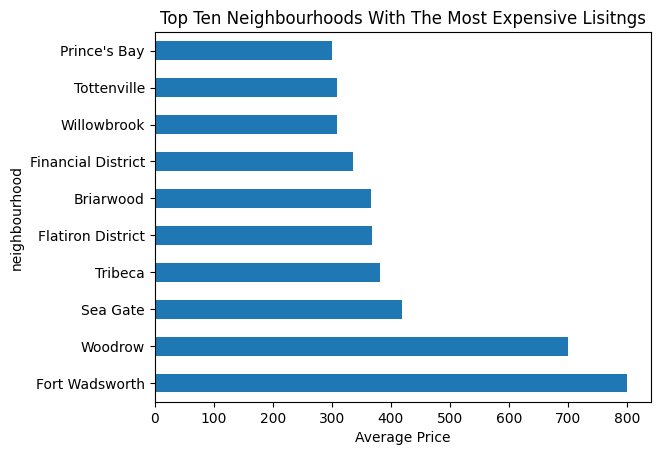

          neighbourhood       price
82       Fort Wadsworth  800.000000
220             Woodrow  700.000000
175            Sea Gate  418.230769
198             Tribeca  381.107143
75    Flatiron District  367.415584
22            Briarwood  366.162162
73   Financial District  335.385057
216         Willowbrook  309.000000
196         Tottenville  309.000000
158        Prince's Bay  300.000000


In [11]:
# our goal is to make a chart reflecting the top 10 most expensive Neighbourhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighbourhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighbourhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

df_grouped = df.groupby('neighbourhood')['price'].mean().reset_index()
df_sorted = df_grouped.sort_values(by='price', ascending=False)

top10_df = df_sorted.head(10)

top10_df.plot.barh(x='neighbourhood', y='price', legend = False)

plt.xlabel('Average Price')
plt.ylabel('neighbourhood')
plt.title('Top Ten Neighbourhoods With The Most Expensive Lisitngs')
plt.show()

print(top10_df)



In [12]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
df_sorted.head(10)

,neighbourhood,price
82,Fort Wadsworth,800.000000
220,Woodrow,700.000000
175,Sea Gate,418.230769
198,Tribeca,381.107143
75,Flatiron District,367.415584
22,Briarwood,366.162162
73,Financial District,335.385057
216,Willowbrook,309.000000
196,Tottenville,309.000000
158,Prince's Bay,300.000000


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

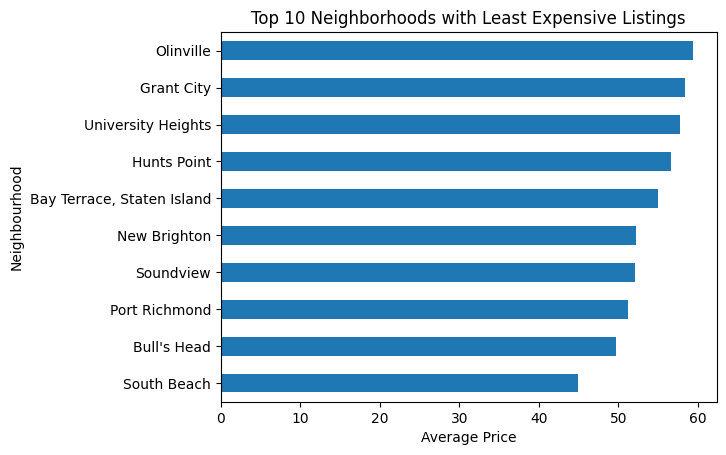

                  neighbourhood      price
181                 South Beach  45.000000
27                  Bull's Head  49.666667
157               Port Richmond  51.222222
180                   Soundview  52.055556
141                New Brighton  52.250000
9    Bay Terrace, Staten Island  55.000000
103                 Hunts Point  56.583333
201          University Heights  57.826087
89                   Grant City  58.400000
150                   Olinville  59.428571


In [13]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
df_grouped_least = df.groupby('neighbourhood')['price'].mean().reset_index()
df_sorted_least = df_grouped_least.sort_values(by='price', ascending=True)

df_10least = df_sorted_least.head(10)

df_10least.plot.barh(x='neighbourhood', y='price', legend=False)
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighborhoods with Least Expensive Listings')
plt.show()

print(df_10least)

In [14]:
# we also would like to have the corresponding pivot table of the lowest 10
sortedList = df_sorted_least.head(10)
print(sortedList)

                  neighbourhood      price
181                 South Beach  45.000000
27                  Bull's Head  49.666667
157               Port Richmond  51.222222
180                   Soundview  52.055556
141                New Brighton  52.250000
9    Bay Terrace, Staten Island  55.000000
103                 Hunts Point  56.583333
201          University Heights  57.826087
89                   Grant City  58.400000
150                   Olinville  59.428571


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!